# #2

1. Remove the feature size
2. Do EDA
3. Do scaling if you think if useful
4. Do regression using different regression algorithms (price is target )
5. Print accuracy score of each.
on bhp dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
bhp_df = pd.read_csv('bhp.csv')
bhp_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


In [3]:
bhp_df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [4]:
bhp_df = pd.read_csv('bhp.csv')
bhp_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


In [5]:
bhp_df.drop('location',axis=1,inplace=True)

In [6]:
# bhp_df['location'].unique()


In [7]:
bhp_df.drop('size',axis=1,inplace=True)

In [8]:
bhp_df.head()

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2,39.07,2,3699
1,2600.0,5,120.00,4,4615
2,1440.0,2,62.00,3,4305
3,1521.0,3,95.00,3,6245
4,1200.0,2,51.00,2,4250


In [9]:
# bhp_df[['location','price']].groupby(['location','price']).size().reset_index()


<AxesSubplot:>

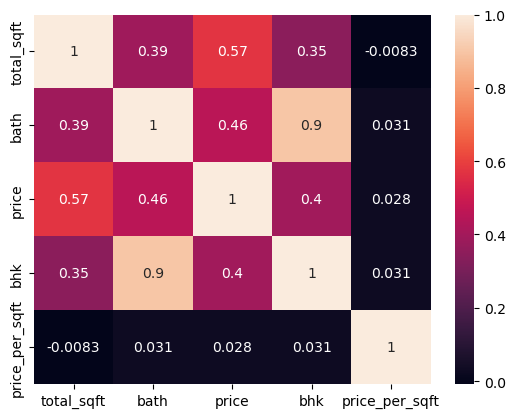

In [10]:
sns.heatmap(bhp_df.corr() , annot=True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_sqft', ylabel='price'>

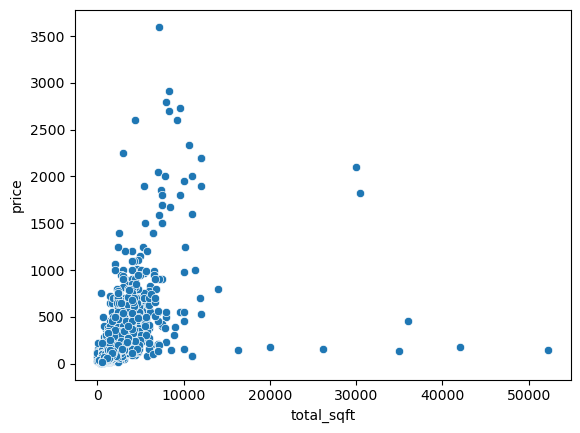

In [11]:
sns.scatterplot('total_sqft' ,'price',data=bhp_df)

In [12]:
bhp_df[bhp_df['total_sqft']>50000]

,total_sqft,bath,price,bhk,price_per_sqft
1867,52272.0,2,140.0,3,267


In [13]:
bhp_df.drop(1867,axis=0,inplace=True) #dropping outlier

In [14]:
# from sklearn.preprocessing import LabelEncoder
# lbl_en = LabelEncoder()
# bhp_df['location']=lbl_en.fit_transform(bhp_df['location'])


In [15]:
bhp_df.head()

,total_sqft,bath,price,bhk,price_per_sqft
0,1056.0,2,39.07,2,3699
1,2600.0,5,120.00,4,4615
2,1440.0,2,62.00,3,4305
3,1521.0,3,95.00,3,6245
4,1200.0,2,51.00,2,4250


In [16]:
bhp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13199 entries, 0 to 13199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_sqft      13199 non-null  float64
 1   bath            13199 non-null  int64  
 2   price           13199 non-null  float64
 3   bhk             13199 non-null  int64  
 4   price_per_sqft  13199 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 618.7 KB


In [17]:
# bhp_df.groupby(['location','price']).size()

In [18]:
bhp_df.columns

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [19]:
# sns.kdeplot(y="price",x="total_sqft",data=bhp_df,fill=True)
# sns.kdeplot(y="price",x="bhk",data=bhp_df,fill=True)


In [20]:
X = bhp_df.drop('price',axis=1)
y = bhp_df.price

In [21]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_scaler = sc.fit_transform(X)


In [22]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaler,y,test_size=0.25, random_state=88)


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=88)


# Linear regression

In [24]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [25]:
y_pred = model1.predict(X_test)

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.42982240273202155

In [27]:
model1.score(X_test,y_test)

0.42982240273202155

In [28]:
model1.score(X_train,y_train)

0.4216059710528888

# Ridge regression (L2 regularization - used for overfitting)

In [29]:
# from sklearn.linear_model import Ridge
# model2 = Ridge()
# model2.fit(X_train,y_train)

In [30]:
# model2.score(X_test,y_test)

# Decision Tree 

In [31]:
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor()
model3.fit(X_train,y_train)

DecisionTreeRegressor()

In [32]:
model3.score(X_test,y_test)

0.9798395643077972

In [33]:
model3.score(X_train,y_train)

0.9999999999986574

# SVR

In [34]:
# from sklearn.svm import SVR
# model4 = SVR(kernel='linear')
# model4.fit(X_train,y_train)

In [35]:
# model4.score(X_test,y_test)